In [1377]:
# importing python packages/libraries.

import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

1.Exploratory Data Analysis (EDA)
Loading the dataset from the CSV file for arabica obtained from github.

In [1378]:
# Loading the arabica ratings data.
df_arabica_coffee = pd.read_csv('arabica_ratings_raw.csv')
display(df_arabica_coffee.head())

,Unnamed: 0,* quality_score,view_certificate_1,view_certificate_2,Cupping Protocol and Descriptors,View Green Analysis Details,Request a Sample,Species,Owner,Country of Origin,...,Quakers,Color,Category Two Defects,NA.3,Expiration,Certification Body,Certification Address,Certification Contact,Unnamed: 51,Notes
0,0,90.58,NaN,NaN,NaN,NaN,NaN,Arabica,metad plc,Ethiopia,...,0.0,Green,0 full defects,NaN,"April 3rd, 2016",METAD Agricultural Development plc,"BAWA Center, 3rd Floor (Gerji), Addis Ababa, E...","Aman Adinew (Emebet Dinku) - +251-116-292534, ...",NaN,NaN
1,1,89.92,NaN,NaN,NaN,NaN,NaN,Arabica,metad plc,Ethiopia,...,0.0,Green,1 full defects,NaN,"April 3rd, 2016",METAD Agricultural Development plc,"BAWA Center, 3rd Floor (Gerji), Addis Ababa, E...","Aman Adinew (Emebet Dinku) - +251-116-292534, ...",NaN,NaN
2,2,89.75,NaN,NaN,NaN,NaN,NaN,Arabica,Grounds for Health Admin,Guatemala,...,0.0,NaN,0 full defects,NaN,"May 31st, 2011",Specialty Coffee Association,"117 W 4th St, Suite 300 Santa Ana, CA 92701",Chris Buck - (562) 624-4100,NaN,NaN
3,3,89.00,NaN,NaN,NaN,NaN,NaN,Arabica,Yidnekachew Dabessa,Ethiopia,...,0.0,Green,2 full defects,NaN,"March 25th, 2016",METAD Agricultural Development plc,"BAWA Center, 3rd Floor (Gerji), Addis Ababa, E...","Aman Adinew (Emebet Dinku) - +251-116-292534, ...",NaN,NaN
4,4,88.83,NaN,NaN,NaN,NaN,NaN,Arabica,metad plc,Ethiopia,...,0.0,Green,2 full defects,NaN,"April 3rd, 2016",METAD Agricultural Development plc,"BAWA Center, 3rd Floor (Gerji), Addis Ababa, E...","Aman Adinew (Emebet Dinku) - +251-116-292534, ...",NaN,NaN


In [1379]:
# Checking the size of dataset
display(df_arabica_coffee.shape)

(1312, 53)

In [1380]:
# There are 53 columns,not all of them are useful.
df_arabica_coffee.columns

Index(['Unnamed: 0', '* quality_score', 'view_certificate_1',
       'view_certificate_2', 'Cupping Protocol and Descriptors',
       'View Green Analysis Details', 'Request a Sample', 'Species', 'Owner',
       'Country of Origin', 'Farm Name', 'Lot Number', 'Mill', 'ICO Number',
       'Company', 'Altitude', 'Region', 'Producer', 'Number of Bags',
       'Bag Weight', 'In-Country Partner', 'Harvest Year', 'Grading Date',
       'Owner.1', 'Variety', 'Status', 'Processing Method', 'NA', 'Aroma',
       'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'NA.1',
       'Uniformity', 'Clean Cup', 'Sweetness', 'Cupper Points',
       'Total Cup Points', 'NA.2', 'Moisture', 'Category One Defects',
       'Quakers', 'Color', 'Category Two Defects', 'NA.3', 'Expiration',
       'Certification Body', 'Certification Address', 'Certification Contact',
       'Unnamed: 51', 'Notes'],
      dtype='object')

1.1.Data Types:
    
The variables in the dataset are mix of numeric and non-numeric variables. 

The numeric values contain dates as well as scalar values

The non-numeric variables contain categorical data, free text and hexadecimal-encoded data.

In [1381]:
# Checking the datatype
display(df_arabica_coffee.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1312 entries, 0 to 1311
Data columns (total 53 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        1312 non-null   int64  
 1   * quality_score                   1312 non-null   float64
 2   view_certificate_1                0 non-null      float64
 3   view_certificate_2                0 non-null      float64
 4   Cupping Protocol and Descriptors  0 non-null      float64
 5   View Green Analysis Details       0 non-null      float64
 6   Request a Sample                  0 non-null      float64
 7   Species                           1312 non-null   object 
 8   Owner                             1305 non-null   object 
 9   Country of Origin                 1311 non-null   object 
 10  Farm Name                         956 non-null    object 
 11  Lot Number                        270 non-null    object 
 12  Mill  

None

1.2.Missing Values:

There are a lot of missing values in this dataset.

In [1382]:
display(df_arabica_coffee.isna().sum().sort_values(ascending=False))

NA.3                                1312
NA.2                                1312
view_certificate_1                  1312
view_certificate_2                  1312
Cupping Protocol and Descriptors    1312
View Green Analysis Details         1312
Request a Sample                    1312
Unnamed: 51                         1312
Notes                               1307
Lot Number                          1042
Farm Name                            356
Mill                                 307
Producer                             230
Altitude                             218
Color                                217
Company                              210
Variety                              202
Processing Method                    153
ICO Number                           146
Region                                56
Harvest Year                          47
Owner                                  7
Owner.1                                7
NA                                     2
Quakers         

In [1383]:
# Removing the columns with high proportion of missing values.
df_arabica_coffee.drop(['Unnamed: 0','NA.3','NA.2','view_certificate_1','view_certificate_2','Cupping Protocol and Descriptors','View Green Analysis Details','Request a Sample','Unnamed: 51','Notes','Lot Number','Certification Address','Certification Contact','Owner.1','Bag Weight','Mill','ICO Number','NA','Quakers','NA.1','Farm Name','Mill'],axis=1,inplace=True) 
df_arabica_coffee.head()

,* quality_score,Species,Owner,Country of Origin,Company,Altitude,Region,Producer,Number of Bags,In-Country Partner,...,Clean Cup,Sweetness,Cupper Points,Total Cup Points,Moisture,Category One Defects,Color,Category Two Defects,Expiration,Certification Body
0,90.58,Arabica,metad plc,Ethiopia,METAD Agricultural Developmet plc,1950-2200,GUJI-HAMBELA/GOYO,METAD PLC,300,METAD Agricultural Development plc,...,10.0,10.0,8.75,Sample 90.58,12%,0 full defects,Green,0 full defects,"April 3rd, 2016",METAD Agricultural Development plc
1,89.92,Arabica,metad plc,Ethiopia,METAD Agricultural Developmet plc,1950-2200,GUJI-HAMBELA/ALAKA,METAD PLC,300,METAD Agricultural Development plc,...,10.0,10.0,8.58,Sample 89.92,12%,0 full defects,Green,1 full defects,"April 3rd, 2016",METAD Agricultural Development plc
2,89.75,Arabica,Grounds for Health Admin,Guatemala,NaN,1600 - 1800 m,NaN,NaN,5,Specialty Coffee Association,...,10.0,10.0,9.25,Sample 89.75,0%,0 full defects,NaN,0 full defects,"May 31st, 2011",Specialty Coffee Association
3,89.00,Arabica,Yidnekachew Dabessa,Ethiopia,Yidnekachew Debessa Coffee Plantation,1800-2200,Oromia,Yidnekachew Dabessa Coffee Plantation,320,METAD Agricultural Development plc,...,10.0,10.0,8.67,Sample 89.00,11%,0 full defects,Green,2 full defects,"March 25th, 2016",METAD Agricultural Development plc
4,88.83,Arabica,metad plc,Ethiopia,METAD Agricultural Developmet plc,1950-2200,GUJI-HAMBELA/BISHAN FUGU,METAD PLC,300,METAD Agricultural Development plc,...,10.0,10.0,8.58,Sample 88.83,12%,0 full defects,Green,2 full defects,"April 3rd, 2016",METAD Agricultural Development plc


In [1384]:
# Renaming the column '* quality_score'.
df_arabica_coffee.rename(
    columns={"* quality_score":"Quality_Score"},inplace=True)

In [1385]:
# In order to analyze the dataset better,splitting in measures, beans and origin.

measures = ['Aroma', 'Flavor','Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean Cup', 'Sweetness', 
             'Cupper Points','Total Cup Points']

beans = ['Species', 'Harvest Year', 'Grading Date','Variety', 'Processing Method', 'Moisture', 'Category One Defects' 
        ,'Color', 'Category Two Defects','Expiration']

origin = ['Country of Origin','Region','Altitude']


In [1386]:
# Measure:
# Checking the dataset filtered by measures.
df_arabica_coffee[measures].head(10)

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Cupper Points,Total Cup Points
0,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.0,10.00,8.75,Sample 90.58
1,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.0,10.00,8.58,Sample 89.92
2,8.42,8.50,8.42,8.42,8.33,8.42,10.00,10.0,10.00,9.25,Sample 89.75
3,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.0,10.00,8.67,Sample 89.00
4,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.0,10.00,8.58,Sample 88.83
5,8.58,8.42,8.42,8.50,8.25,8.33,10.00,10.0,10.00,8.33,Sample 88.83
6,8.42,8.50,8.33,8.50,8.25,8.25,10.00,10.0,10.00,8.50,Sample 88.75
7,8.25,8.33,8.50,8.42,8.33,8.50,10.00,10.0,9.33,9.00,Sample 88.67
8,8.67,8.67,8.58,8.42,8.33,8.42,9.33,10.0,9.33,8.67,Sample 88.42
9,8.08,8.58,8.50,8.50,7.67,8.42,10.00,10.0,10.00,8.50,Sample 88.25


In [1387]:
# Checking missing values. 
df_arabica_coffee[measures].isna().sum()

Aroma               0
Flavor              0
Aftertaste          0
Acidity             0
Body                0
Balance             0
Uniformity          0
Clean Cup           0
Sweetness           0
Cupper Points       0
Total Cup Points    0
dtype: int64

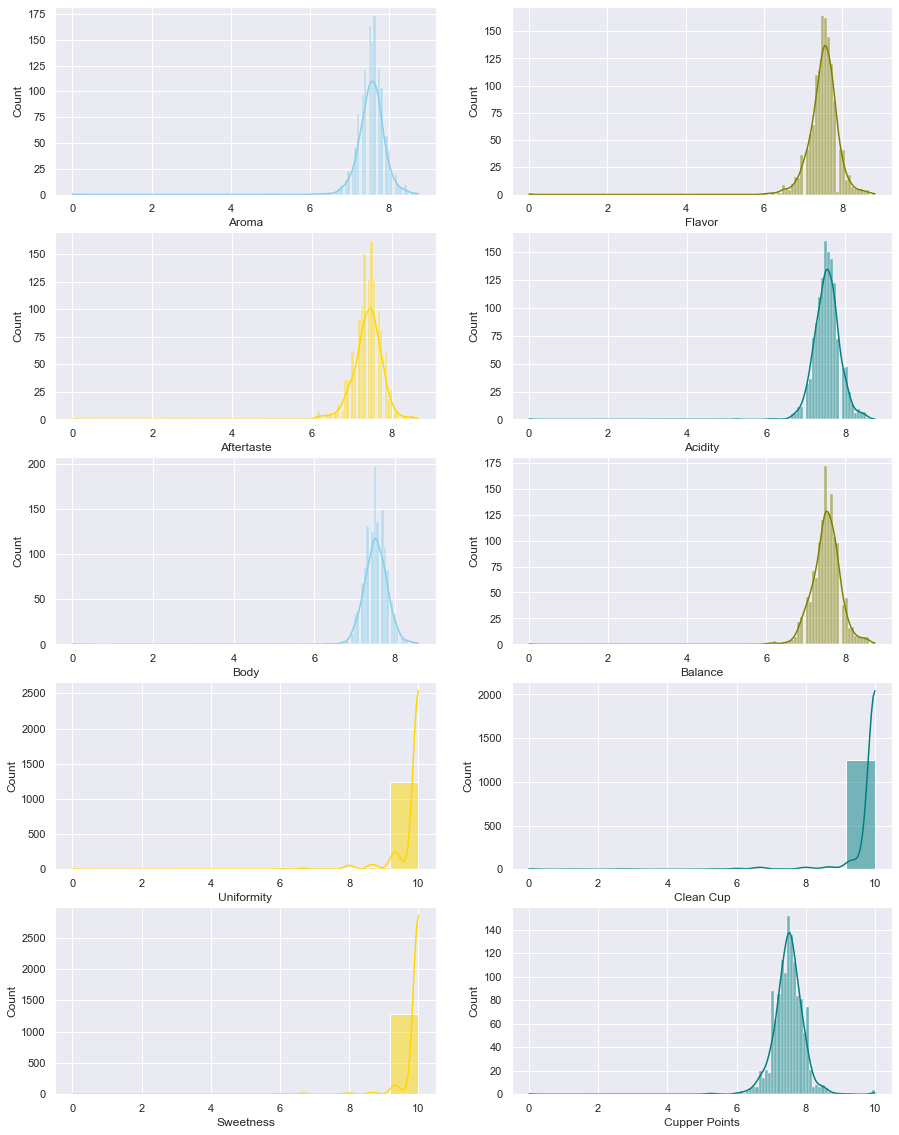

In [1388]:
# Checking the distribution of each coffee characteristics.
sns.set(style="darkgrid")

fig,axs = plt.subplots(5, 2, figsize=(15, 20))

sns.histplot(data=df_arabica_coffee, x="Aroma", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df_arabica_coffee, x="Flavor", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df_arabica_coffee, x="Aftertaste", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df_arabica_coffee, x="Acidity", kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=df_arabica_coffee, x="Body", kde=True, color="skyblue", ax=axs[2, 0])
sns.histplot(data=df_arabica_coffee, x="Balance", kde=True, color="olive", ax=axs[2, 1])
sns.histplot(data=df_arabica_coffee, x="Uniformity", kde=True, color="gold", ax=axs[3, 0])
sns.histplot(data=df_arabica_coffee, x="Clean Cup", kde=True, color="teal", ax=axs[3, 1])
sns.histplot(data=df_arabica_coffee, x="Sweetness", kde=True, color="gold", ax=axs[4, 0])
sns.histplot(data=df_arabica_coffee, x="Cupper Points", kde=True, color="teal", ax=axs[4, 1])

plt.show()

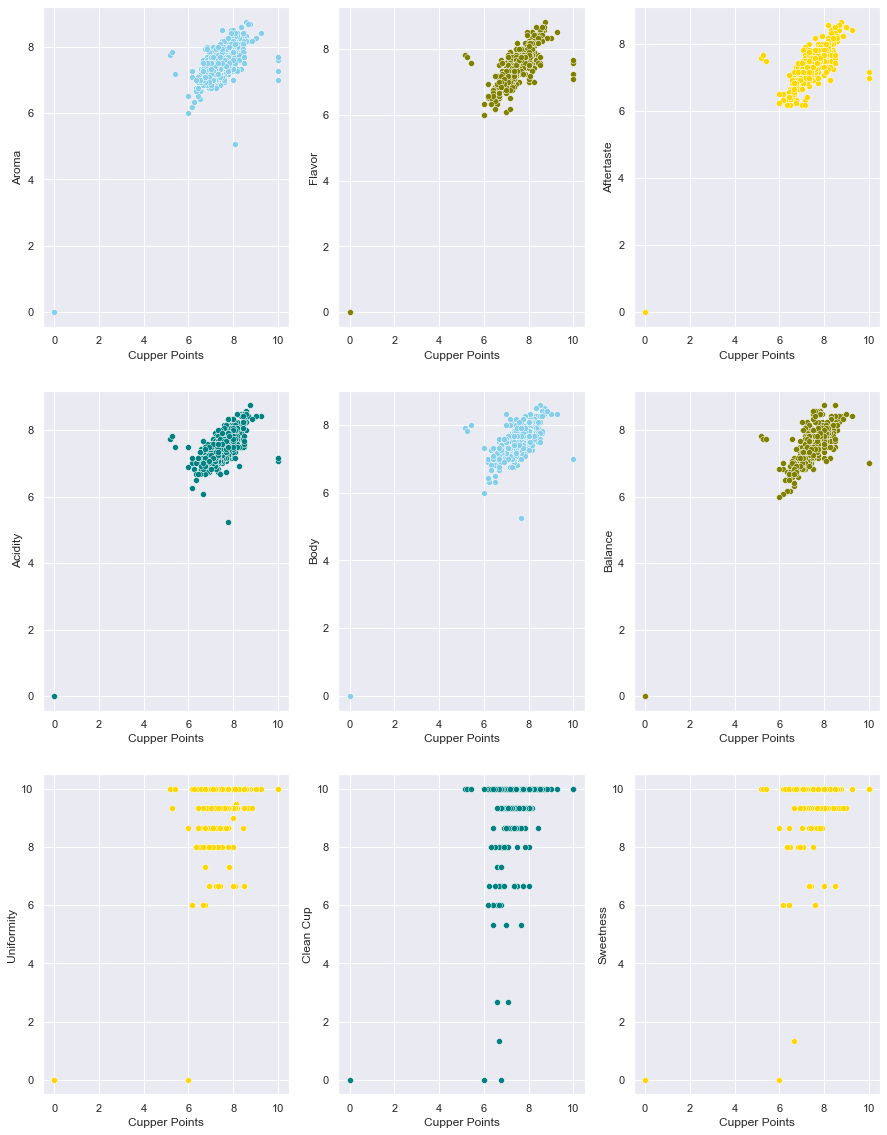

In [1389]:
# Checking the correlation among coffee characteristics and Cupper point through Scatterplots.
# The variable "Total.Cup.Points" was not considered since it is the result of adding all measure values.  
sns.set(style="darkgrid")

fig, axs = plt.subplots(3, 3, figsize=(15, 20))

sns.scatterplot(data=df_arabica_coffee, y="Aroma", x = "Cupper Points", color="skyblue", ax=axs[0, 0])
sns.scatterplot(data=df_arabica_coffee, y="Flavor", x = "Cupper Points", color="olive", ax=axs[0, 1])
sns.scatterplot(data=df_arabica_coffee, y="Aftertaste", x = "Cupper Points", color="gold", ax=axs[0, 2])
sns.scatterplot(data=df_arabica_coffee, y="Acidity", x = "Cupper Points", color="teal", ax=axs[1, 0])
sns.scatterplot(data=df_arabica_coffee, y="Body", x = "Cupper Points", color="skyblue", ax=axs[1, 1])
sns.scatterplot(data=df_arabica_coffee, y="Balance", x = "Cupper Points",  color="olive", ax=axs[1, 2])
sns.scatterplot(data=df_arabica_coffee, y="Uniformity", x = "Cupper Points", color="gold", ax=axs[2, 0])
sns.scatterplot(data=df_arabica_coffee, y="Clean Cup", x = "Cupper Points", color="teal", ax=axs[2, 1])
sns.scatterplot(data=df_arabica_coffee, y="Sweetness", x = "Cupper Points", color="gold", ax=axs[2, 2])

plt.show()

1.4.Exploration of Date Variables.

In [1390]:
# Beans:
# These variables contain information regarding the beans, such as Harvest year,Processing method,grading year and Expiration.
# Checking the dataset, filtering by beans.
df_arabica_coffee[beans].head(10)

,Species,Harvest Year,Grading Date,Variety,Processing Method,Moisture,Category One Defects,Color,Category Two Defects,Expiration
0,Arabica,2014,"April 4th, 2015",NaN,Washed / Wet,12%,0 full defects,Green,0 full defects,"April 3rd, 2016"
1,Arabica,2014,"April 4th, 2015",Other,Washed / Wet,12%,0 full defects,Green,1 full defects,"April 3rd, 2016"
2,Arabica,NaN,"May 31st, 2010",Bourbon,NaN,0%,0 full defects,NaN,0 full defects,"May 31st, 2011"
3,Arabica,2014,"March 26th, 2015",NaN,Natural / Dry,11%,0 full defects,Green,2 full defects,"March 25th, 2016"
4,Arabica,2014,"April 4th, 2015",Other,Washed / Wet,12%,0 full defects,Green,2 full defects,"April 3rd, 2016"
5,Arabica,2013,"September 3rd, 2013",NaN,Natural / Dry,11%,0 full defects,Bluish-Green,1 full defects,"September 3rd, 2014"
6,Arabica,2012,"September 17th, 2012",Other,Washed / Wet,11%,0 full defects,Bluish-Green,0 full defects,"September 17th, 2013"
7,Arabica,Mar-10,"September 2nd, 2010",NaN,NaN,3%,0 full defects,NaN,0 full defects,"September 2nd, 2011"
8,Arabica,Mar-10,"September 2nd, 2010",NaN,NaN,3%,0 full defects,NaN,0 full defects,"September 2nd, 2011"
9,Arabica,2014,"March 30th, 2015",Other,Natural / Dry,10%,0 full defects,Green,4 full defects,"March 29th, 2016"


In [1391]:
# Checking missing values
df_arabica_coffee[beans].isna().sum()

Species                   0
Harvest Year             47
Grading Date              0
Variety                 202
Processing Method       153
Moisture                  0
Category One Defects      0
Color                   217
Category Two Defects      0
Expiration                0
dtype: int64

In [1392]:
# Replacing NaN values by Unknown
df_arabica_coffee['Harvest Year'][df_arabica_coffee['Harvest Year'].isna()] = 'Unknown'

In [1393]:
# Checking Harvest year
df_arabica_coffee['Harvest Year'].value_counts()

2012                        352
2014                        226
2013                        170
2015                        125
2016                        122
2017                         68
Unknown                      47
2013/2014                    29
2015/2016                    28
2011                         26
2017 / 2018                  19
2014/2015                    19
2009/2010                    12
2010                         10
2010-2011                     6
2016 / 2017                   6
4T/10                         4
Mar-10                        3
Mayo a Julio                  3
2009-2010                     3
4T/2010                       3
Abril - Julio                 2
Jan-11                        2
2011/2012                     2
08/09 crop                    2
TEST                          2
mmm                           1
4T72010                       1
2018                          1
1t/2011                       1
2016/2017                     1
3T/2011 

In [1394]:
# Formatting 'Harvest year' column by Replacing it to 'yyyy' format.
harvest = []
for i in df_arabica_coffee['Harvest Year']:
    if re.search("[2][0]\d\d", i):
        year = re.search("[2][0]\d\d", i).group()
        harvest.append(year)
    elif re.search("\d\d", i):
        year_1 = re.search('\d\d', i).group()
        year = '20'+year_1
        harvest.append(year)
    else:
        harvest.append('Unknown')

df_arabica_coffee['Harvest Year'] = harvest

In [1395]:
# Checking Harvest year after modifications.
df_arabica_coffee['Harvest Year'].value_counts()

2012       352
2014       245
2013       199
2015       153
2016       129
2017        87
Unknown     58
2011        36
2010        29
2009        20
2008         2
2023         1
2018         1
Name: Harvest Year, dtype: int64

In [1396]:
#'Expiration' is exactly 'Grading Date' + 365 days so dropping 'Expiration'for our analysis, as high correlation doesn't bring any actionable information.

df_arabica_coffee['Harvest Year'] = pd.to_datetime(df_arabica_coffee['Harvest Year'], format='%Y', errors='coerce')
df_arabica_coffee['Grading Date'] = pd.to_datetime(df_arabica_coffee['Grading Date'])
df_arabica_coffee['Expiration'] = pd.to_datetime(df_arabica_coffee['Expiration'])

df_arabica_coffee['date_diff'] = (df_arabica_coffee['Expiration'] - df_arabica_coffee['Grading Date']).dt.days

display(df_arabica_coffee[['Harvest Year', 'Grading Date', 'Expiration']].describe())
display(df_arabica_coffee[['date_diff']].describe())

,Harvest Year,Grading Date,Expiration
count,1254,1312,1312
unique,12,557,557
top,2012-01-01 00:00:00,2013-12-26 00:00:00,2014-12-26 00:00:00
freq,352,25,25
first,2008-01-01 00:00:00,2010-04-09 00:00:00,2011-04-09 00:00:00
last,2023-01-01 00:00:00,2018-01-19 00:00:00,2019-01-19 00:00:00


,date_diff
count,1312.0
mean,365.0
std,0.0
min,365.0
25%,365.0
50%,365.0
75%,365.0
max,365.0


In [1397]:
# Dropping 'Expiration' column from the dataset.
df_arabica_coffee.drop(['Expiration'],axis=1,inplace=True) 
df_arabica_coffee.head()

,Quality_Score,Species,Owner,Country of Origin,Company,Altitude,Region,Producer,Number of Bags,In-Country Partner,...,Clean Cup,Sweetness,Cupper Points,Total Cup Points,Moisture,Category One Defects,Color,Category Two Defects,Certification Body,date_diff
0,90.58,Arabica,metad plc,Ethiopia,METAD Agricultural Developmet plc,1950-2200,GUJI-HAMBELA/GOYO,METAD PLC,300,METAD Agricultural Development plc,...,10.0,10.0,8.75,Sample 90.58,12%,0 full defects,Green,0 full defects,METAD Agricultural Development plc,365
1,89.92,Arabica,metad plc,Ethiopia,METAD Agricultural Developmet plc,1950-2200,GUJI-HAMBELA/ALAKA,METAD PLC,300,METAD Agricultural Development plc,...,10.0,10.0,8.58,Sample 89.92,12%,0 full defects,Green,1 full defects,METAD Agricultural Development plc,365
2,89.75,Arabica,Grounds for Health Admin,Guatemala,NaN,1600 - 1800 m,NaN,NaN,5,Specialty Coffee Association,...,10.0,10.0,9.25,Sample 89.75,0%,0 full defects,NaN,0 full defects,Specialty Coffee Association,365
3,89.00,Arabica,Yidnekachew Dabessa,Ethiopia,Yidnekachew Debessa Coffee Plantation,1800-2200,Oromia,Yidnekachew Dabessa Coffee Plantation,320,METAD Agricultural Development plc,...,10.0,10.0,8.67,Sample 89.00,11%,0 full defects,Green,2 full defects,METAD Agricultural Development plc,365
4,88.83,Arabica,metad plc,Ethiopia,METAD Agricultural Developmet plc,1950-2200,GUJI-HAMBELA/BISHAN FUGU,METAD PLC,300,METAD Agricultural Development plc,...,10.0,10.0,8.58,Sample 88.83,12%,0 full defects,Green,2 full defects,METAD Agricultural Development plc,365


In [1398]:
# Checking Variety
df_arabica_coffee.Variety.value_counts()

Caturra                  256
Bourbon                  226
Typica                   211
Other                    108
Catuai                    74
Hawaiian Kona             44
Yellow Bourbon            35
Mundo Novo                33
Catimor                   20
SL14                      17
SL28                      15
Pacas                     13
Gesha                     12
SL34                       8
Pacamara                   8
Arusha                     5
Peaberry                   5
Sumatra                    3
Mandheling                 3
Ruiru 11                   2
Blue Mountain              2
Ethiopian Yirgacheffe      2
Java                       2
Ethiopian Heirlooms        1
Moka Peaberry              1
Sulawesi                   1
Sumatra Lintong            1
Marigojipe                 1
Pache Comun                1
Name: Variety, dtype: int64

In [1399]:
# Column'variety'has 202 missing values,replacing it with "other".
# Replacing NaN
df_arabica_coffee['Variety'][df_arabica_coffee.Variety.isna()] = 'Other'
df_arabica_coffee

,Quality_Score,Species,Owner,Country of Origin,Company,Altitude,Region,Producer,Number of Bags,In-Country Partner,...,Clean Cup,Sweetness,Cupper Points,Total Cup Points,Moisture,Category One Defects,Color,Category Two Defects,Certification Body,date_diff
0,90.58,Arabica,metad plc,Ethiopia,METAD Agricultural Developmet plc,1950-2200,GUJI-HAMBELA/GOYO,METAD PLC,300,METAD Agricultural Development plc,...,10.00,10.00,8.75,Sample 90.58,12%,0 full defects,Green,0 full defects,METAD Agricultural Development plc,365
1,89.92,Arabica,metad plc,Ethiopia,METAD Agricultural Developmet plc,1950-2200,GUJI-HAMBELA/ALAKA,METAD PLC,300,METAD Agricultural Development plc,...,10.00,10.00,8.58,Sample 89.92,12%,0 full defects,Green,1 full defects,METAD Agricultural Development plc,365
2,89.75,Arabica,Grounds for Health Admin,Guatemala,NaN,1600 - 1800 m,NaN,NaN,5,Specialty Coffee Association,...,10.00,10.00,9.25,Sample 89.75,0%,0 full defects,NaN,0 full defects,Specialty Coffee Association,365
3,89.00,Arabica,Yidnekachew Dabessa,Ethiopia,Yidnekachew Debessa Coffee Plantation,1800-2200,Oromia,Yidnekachew Dabessa Coffee Plantation,320,METAD Agricultural Development plc,...,10.00,10.00,8.67,Sample 89.00,11%,0 full defects,Green,2 full defects,METAD Agricultural Development plc,365
4,88.83,Arabica,metad plc,Ethiopia,METAD Agricultural Developmet plc,1950-2200,GUJI-HAMBELA/BISHAN FUGU,METAD PLC,300,METAD Agricultural Development plc,...,10.00,10.00,8.58,Sample 88.83,12%,0 full defects,Green,2 full defects,METAD Agricultural Development plc,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,67.92,Arabica,Myriam Kaplan-Pasternak,Haiti,Haiti Coffee,~350m,"Department d'Artibonite , Haiti",COEB Koperativ Ekselsyo Basen,1,Specialty Coffee Association,...,6.00,6.00,6.42,Sample 67.92,14%,8 full defects,Blue-Green,16 full defects,Specialty Coffee Association,365
1308,63.08,Arabica,"Exportadora Atlantic, S.A.",Nicaragua,Exportadora Atlantic S.A,1100,jalapa,Teófilo Narváez,550,Instituto Hondureño del Café,...,6.00,6.00,6.17,Sample 63.08,13%,1 full defects,Green,5 full defects,Instituto Hondureño del Café,365
1309,59.83,Arabica,Juan Luis Alvarado Romero,Guatemala,"UNICAFE, S.A",4650,NUEVO ORIENTE ALDEA EL LIMON,WILLIAM ESTUARDO MARTINEZ PACHECO,275,Asociacion Nacional Del Café,...,1.33,1.33,6.67,Sample 59.83,10%,0 full defects,Green,4 full defects,Asociacion Nacional Del Café,365
1310,43.13,Arabica,Ethiopia Commodity Exchange,Ethiopia,NaN,TEST,TEST,TEST,0,Ethiopia Commodity Exchange,...,0.00,0.00,6.00,Sample 43.13,0%,0 full defects,NaN,0 full defects,Ethiopia Commodity Exchange,365


In [1400]:
# Checking processing method
df_arabica_coffee['Processing Method'].value_counts()

Washed / Wet                 812
Natural / Dry                251
Semi-washed / Semi-pulped     56
Other                         26
Pulped natural / honey        14
Name: Processing Method, dtype: int64

In [1401]:
# Column'Processing Method' has 153 missing values,replacing it with "Other".
# Replacing NaN
df_arabica_coffee['Processing Method'][df_arabica_coffee['Processing Method'].isna()] = 'Other'
#df['Processing.Method'][df['Processing.Method'].isna()] = 'Other'

In [1402]:
# Checking missing value in Color.
df_arabica_coffee['Color'].value_counts()

Green           850
Bluish-Green    112
Blue-Green       82
None             51
Name: Color, dtype: int64

In [1403]:
# Column'Color' has 217 missing values,replacing it with "None" as this category already exist.
# Replacing NaN
df_arabica_coffee['Color'][df_arabica_coffee['Color'].isna()] = 'None'
df_arabica_coffee

,Quality_Score,Species,Owner,Country of Origin,Company,Altitude,Region,Producer,Number of Bags,In-Country Partner,...,Clean Cup,Sweetness,Cupper Points,Total Cup Points,Moisture,Category One Defects,Color,Category Two Defects,Certification Body,date_diff
0,90.58,Arabica,metad plc,Ethiopia,METAD Agricultural Developmet plc,1950-2200,GUJI-HAMBELA/GOYO,METAD PLC,300,METAD Agricultural Development plc,...,10.00,10.00,8.75,Sample 90.58,12%,0 full defects,Green,0 full defects,METAD Agricultural Development plc,365
1,89.92,Arabica,metad plc,Ethiopia,METAD Agricultural Developmet plc,1950-2200,GUJI-HAMBELA/ALAKA,METAD PLC,300,METAD Agricultural Development plc,...,10.00,10.00,8.58,Sample 89.92,12%,0 full defects,Green,1 full defects,METAD Agricultural Development plc,365
2,89.75,Arabica,Grounds for Health Admin,Guatemala,NaN,1600 - 1800 m,NaN,NaN,5,Specialty Coffee Association,...,10.00,10.00,9.25,Sample 89.75,0%,0 full defects,None,0 full defects,Specialty Coffee Association,365
3,89.00,Arabica,Yidnekachew Dabessa,Ethiopia,Yidnekachew Debessa Coffee Plantation,1800-2200,Oromia,Yidnekachew Dabessa Coffee Plantation,320,METAD Agricultural Development plc,...,10.00,10.00,8.67,Sample 89.00,11%,0 full defects,Green,2 full defects,METAD Agricultural Development plc,365
4,88.83,Arabica,metad plc,Ethiopia,METAD Agricultural Developmet plc,1950-2200,GUJI-HAMBELA/BISHAN FUGU,METAD PLC,300,METAD Agricultural Development plc,...,10.00,10.00,8.58,Sample 88.83,12%,0 full defects,Green,2 full defects,METAD Agricultural Development plc,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,67.92,Arabica,Myriam Kaplan-Pasternak,Haiti,Haiti Coffee,~350m,"Department d'Artibonite , Haiti",COEB Koperativ Ekselsyo Basen,1,Specialty Coffee Association,...,6.00,6.00,6.42,Sample 67.92,14%,8 full defects,Blue-Green,16 full defects,Specialty Coffee Association,365
1308,63.08,Arabica,"Exportadora Atlantic, S.A.",Nicaragua,Exportadora Atlantic S.A,1100,jalapa,Teófilo Narváez,550,Instituto Hondureño del Café,...,6.00,6.00,6.17,Sample 63.08,13%,1 full defects,Green,5 full defects,Instituto Hondureño del Café,365
1309,59.83,Arabica,Juan Luis Alvarado Romero,Guatemala,"UNICAFE, S.A",4650,NUEVO ORIENTE ALDEA EL LIMON,WILLIAM ESTUARDO MARTINEZ PACHECO,275,Asociacion Nacional Del Café,...,1.33,1.33,6.67,Sample 59.83,10%,0 full defects,Green,4 full defects,Asociacion Nacional Del Café,365
1310,43.13,Arabica,Ethiopia Commodity Exchange,Ethiopia,NaN,TEST,TEST,TEST,0,Ethiopia Commodity Exchange,...,0.00,0.00,6.00,Sample 43.13,0%,0 full defects,None,0 full defects,Ethiopia Commodity Exchange,365


In [1404]:
# Origin:
# These variables contain information about the origin of the coffee, such as Country and Region.

In [1405]:
# Checking the dataset filtered by origin.
df_arabica_coffee[origin].head(10)

,Country of Origin,Region,Altitude
0,Ethiopia,GUJI-HAMBELA/GOYO,1950-2200
1,Ethiopia,GUJI-HAMBELA/ALAKA,1950-2200
2,Guatemala,NaN,1600 - 1800 m
3,Ethiopia,Oromia,1800-2200
4,Ethiopia,GUJI-HAMBELA/BISHAN FUGU,1950-2200
5,Brazil,NaN,NaN
6,Peru,NaN,NaN
7,Ethiopia,Oromia,1570-1700
8,Ethiopia,Oromiya,1570-1700
9,Ethiopia,"SNNP/Kaffa Zone,GimboWereda",1795-1850


In [1406]:
# Checking missing data
df_arabica_coffee[origin].isna().sum()

Country of Origin      1
Region                56
Altitude             218
dtype: int64

In [1407]:
# Checkin missing data in variable Country.of.Origin
df_arabica_coffee[df_arabica_coffee['Country of Origin'].isna()]

,Quality_Score,Species,Owner,Country of Origin,Company,Altitude,Region,Producer,Number of Bags,In-Country Partner,...,Clean Cup,Sweetness,Cupper Points,Total Cup Points,Moisture,Category One Defects,Color,Category Two Defects,Certification Body,date_diff
1197,79.08,Arabica,Racafe & Cia S.C.A,NaN,NaN,NaN,NaN,NaN,149,Almacafé,...,10.0,10.0,7.25,Sample 79.08,10%,0 full defects,None,3 full defects,Almacafé,365


In [1408]:
# Dropping the row as there are lot of missing values.
df_arabica_coffee.drop(index = 1197, inplace = True)

In [1409]:
# Checking the regions 
df_arabica_coffee.Region.unique()

array(['GUJI-HAMBELA/GOYO', 'GUJI-HAMBELA/ALAKA', nan, 'Oromia',
       'GUJI-HAMBELA/BISHAN FUGU', 'Oromiya',
       'SNNP/Kaffa Zone,GimboWereda', 'Antioquía-Giraldo',
       'Antioquía-Betulia', 'Kona', 'Antioquía-Caicedo', 'Sulawesi',
       'Yirgacheffe', 'Yunnan Province XiShuangBanNa City Menghai County',
       'Gedio', 'SAN RAMON', 'XALAPA', 'Sidamo', 'South of Minas',
       'Kapchorwa Eastern', 'Comayagua',
       'Leye, Alishan Township, Chiayi County', 'Vale da Grama',
       'West and Central Valley', 'Muranga', 'KONA', 'Antioquía-Urrao',
       'Chiang Rai', 'Sul de Minas - Carmo de Minas',
       'Guoxing Township, Nantou County 南投縣國姓鄉', 'NYERI',
       'South of Minas Gerais', 'Eastern Uganda', 'Tolima', 'Kiambu',
       'Sipi, Mt Elgon', 'NUEVO ORIENTE', 'Eastern', 'Huila', 'Boquete',
       'ACATENANGO, CHIMALTENANGO', 'NUEVO ORIENTE ALDEA EL LIMON',
       'addis ababa', 'Cajamarca', 'Eastern Highlands Province',
       'Apaneca Llamantepec',
       'Ataco, Apaneca 

In [1410]:
# Checking missing values.
df_arabica_coffee['Region'].isna()

0       False
1       False
2        True
3       False
4       False
        ...  
1307    False
1308    False
1309    False
1310    False
1311    False
Name: Region, Length: 1311, dtype: bool

In [1411]:
# These NaN will be replaced by Unknown.
df_arabica_coffee['Region'][df_arabica_coffee['Region'].isna()] = 'Unknown'
df_arabica_coffee.head()

,Quality_Score,Species,Owner,Country of Origin,Company,Altitude,Region,Producer,Number of Bags,In-Country Partner,...,Clean Cup,Sweetness,Cupper Points,Total Cup Points,Moisture,Category One Defects,Color,Category Two Defects,Certification Body,date_diff
0,90.58,Arabica,metad plc,Ethiopia,METAD Agricultural Developmet plc,1950-2200,GUJI-HAMBELA/GOYO,METAD PLC,300,METAD Agricultural Development plc,...,10.0,10.0,8.75,Sample 90.58,12%,0 full defects,Green,0 full defects,METAD Agricultural Development plc,365
1,89.92,Arabica,metad plc,Ethiopia,METAD Agricultural Developmet plc,1950-2200,GUJI-HAMBELA/ALAKA,METAD PLC,300,METAD Agricultural Development plc,...,10.0,10.0,8.58,Sample 89.92,12%,0 full defects,Green,1 full defects,METAD Agricultural Development plc,365
2,89.75,Arabica,Grounds for Health Admin,Guatemala,NaN,1600 - 1800 m,Unknown,NaN,5,Specialty Coffee Association,...,10.0,10.0,9.25,Sample 89.75,0%,0 full defects,None,0 full defects,Specialty Coffee Association,365
3,89.00,Arabica,Yidnekachew Dabessa,Ethiopia,Yidnekachew Debessa Coffee Plantation,1800-2200,Oromia,Yidnekachew Dabessa Coffee Plantation,320,METAD Agricultural Development plc,...,10.0,10.0,8.67,Sample 89.00,11%,0 full defects,Green,2 full defects,METAD Agricultural Development plc,365
4,88.83,Arabica,metad plc,Ethiopia,METAD Agricultural Developmet plc,1950-2200,GUJI-HAMBELA/BISHAN FUGU,METAD PLC,300,METAD Agricultural Development plc,...,10.0,10.0,8.58,Sample 88.83,12%,0 full defects,Green,2 full defects,METAD Agricultural Development plc,365


In [1412]:
# Checking the variable Country of Origin.
df_arabica_coffee['Country of Origin'].value_counts()

Mexico                          236
Colombia                        183
Guatemala                       181
Brazil                          132
Taiwan                           75
United States (Hawaii)           73
Honduras                         53
Costa Rica                       51
Ethiopia                         45
Tanzania, United Republic Of     40
Thailand                         32
Uganda                           26
Nicaragua                        26
Kenya                            25
El Salvador                      21
Indonesia                        20
China                            16
Malawi                           11
Peru                             10
United States                     8
Myanmar                           8
Vietnam                           7
Haiti                             6
Philippines                       5
Panama                            4
United States (Puerto Rico)       4
Laos                              3
Burundi                     

In [1413]:
# Replacing 'Tanzania, United Republic Of' by Tanzania.
df_arabica_coffee['Country of Origin'][df_arabica_coffee['Country of Origin'] == 'Tanzania, United Republic Of'] = 'Tanzania'

In [1414]:
# Replacing 'Cote d?Ivoire' by Cote d'Ivoire.
df_arabica_coffee['Country of Origin'][df_arabica_coffee['Country of Origin'] == 'Cote d?Ivoire'] = "Cote d'Ivoire"

In [1415]:
# Checking the variable of altitude grouping by Country of origin.
# Checking the variable of altitude grouping by Country of origin.
[df_arabica_coffee[origin].groupby('Country of Origin').mean()]

[Empty DataFrame
 Columns: []
 Index: [Brazil, Burundi, China, Colombia, Costa Rica, Cote d'Ivoire, Ecuador, El Salvador, Ethiopia, Guatemala, Haiti, Honduras, India, Indonesia, Japan, Kenya, Laos, Malawi, Mauritius, Mexico, Myanmar, Nicaragua, Panama, Papua New Guinea, Peru, Philippines, Rwanda, Taiwan, Tanzania, Thailand, Uganda, United States, United States (Hawaii), United States (Puerto Rico), Vietnam, Zambia]]

In [1416]:
# Checking the altitude in Nicaragua
df_arabica_coffee[origin][df_arabica_coffee['Country of Origin'] == 'Nicaragua']

,Country of Origin,Region,Altitude
30,Nicaragua,Unknown,NaN
124,Nicaragua,Jinotega,800-1050m
217,Nicaragua,"Jinotega, Nicaragua",de 900 a 1100 msnm
317,Nicaragua,"JINOTEGA, NICARAGUA",1250
531,Nicaragua,Matagalpa,NaN
758,Nicaragua,JINOTEGA PROVINCE,1000
822,Nicaragua,Unknown,NaN
875,Nicaragua,"Jinotega, Nicaragua",NaN
911,Nicaragua,JALAPA,1100
964,Nicaragua,Jinotega,1100


In [1417]:
df_arabica_coffee.fillna('N/A', inplace = True)
df_arabica_coffee.head()

,Quality_Score,Species,Owner,Country of Origin,Company,Altitude,Region,Producer,Number of Bags,In-Country Partner,...,Clean Cup,Sweetness,Cupper Points,Total Cup Points,Moisture,Category One Defects,Color,Category Two Defects,Certification Body,date_diff
0,90.58,Arabica,metad plc,Ethiopia,METAD Agricultural Developmet plc,1950-2200,GUJI-HAMBELA/GOYO,METAD PLC,300,METAD Agricultural Development plc,...,10.0,10.0,8.75,Sample 90.58,12%,0 full defects,Green,0 full defects,METAD Agricultural Development plc,365
1,89.92,Arabica,metad plc,Ethiopia,METAD Agricultural Developmet plc,1950-2200,GUJI-HAMBELA/ALAKA,METAD PLC,300,METAD Agricultural Development plc,...,10.0,10.0,8.58,Sample 89.92,12%,0 full defects,Green,1 full defects,METAD Agricultural Development plc,365
2,89.75,Arabica,Grounds for Health Admin,Guatemala,N/A,1600 - 1800 m,Unknown,N/A,5,Specialty Coffee Association,...,10.0,10.0,9.25,Sample 89.75,0%,0 full defects,None,0 full defects,Specialty Coffee Association,365
3,89.00,Arabica,Yidnekachew Dabessa,Ethiopia,Yidnekachew Debessa Coffee Plantation,1800-2200,Oromia,Yidnekachew Dabessa Coffee Plantation,320,METAD Agricultural Development plc,...,10.0,10.0,8.67,Sample 89.00,11%,0 full defects,Green,2 full defects,METAD Agricultural Development plc,365
4,88.83,Arabica,metad plc,Ethiopia,METAD Agricultural Developmet plc,1950-2200,GUJI-HAMBELA/BISHAN FUGU,METAD PLC,300,METAD Agricultural Development plc,...,10.0,10.0,8.58,Sample 88.83,12%,0 full defects,Green,2 full defects,METAD Agricultural Development plc,365


In [1418]:
Cleaned_csv = df_arabica_coffee.to_csv('arabica_cleaned_data',index= False)
